Importando as pacotes

In [100]:
import pandas as pd

Lendo os arquivos

In [101]:
#try:
#  from google.colab import drive
#  drive.mount('/content/drive')
#exception:
#  pass

In [102]:
try:
  df_orders = pd.read_csv('drive/MyDrive/cct/dataset/olist_orders_dataset.csv.zip', compression='zip')
  df_reviews = pd.read_csv('dataset/olist_order_reviews_dataset.csv.zip', compression='zip')
  df_customers = pd.read_csv('dataset/olist_customers_dataset.csv.zip', compression='zip')
  df_geolocation = pd.read_csv('dataset/olist_geolocation_dataset.csv.zip', compression='zip')
  df_items = pd.read_csv('dataset/olist_order_items_dataset.csv.zip', compression='zip')
  df_payments = pd.read_csv('dataset/olist_order_payments_dataset.csv.zip', compression='zip')
  df_products = pd.read_csv('dataset/olist_products_dataset.csv.zip', compression='zip')
except:
  #Google Colab
  from google.colab import drive
  drive.mount('/content/drive')
  df_orders = pd.read_csv('drive/MyDrive/cct/dataset/olist_orders_dataset.csv.zip', compression='zip')
  df_reviews = pd.read_csv('drive/MyDrive/cct/dataset/olist_order_reviews_dataset.csv.zip', compression='zip')
  df_customers = pd.read_csv('drive/MyDrive/cct/dataset/olist_customers_dataset.csv.zip', compression='zip')
  df_geolocation = pd.read_csv('drive/MyDrive/cct/dataset/olist_geolocation_dataset.csv.zip', compression='zip')
  df_items = pd.read_csv('drive/MyDrive/cct/dataset/olist_order_items_dataset.csv.zip', compression='zip')
  df_payments = pd.read_csv('drive/MyDrive/cct/dataset/olist_order_payments_dataset.csv.zip', compression='zip')
  df_products = pd.read_csv('drive/MyDrive/cct/dataset/olist_products_dataset.csv.zip', compression='zip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Verificando os tipos

In [103]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [104]:
df_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Tratando as datas

In [105]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [106]:
df_geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [107]:
df_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [108]:
df_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [109]:
df_products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [110]:
#Base de Orders
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], format = '%Y/%m/%d %H:%M:%S.%f')
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'], format = '%Y/%m/%d %H:%M:%S.%f')
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'], format = '%Y/%m/%d %H:%M:%S.%f')
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'], format = '%Y/%m/%d %H:%M:%S.%f')
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"], format = '%Y/%m/%d').dt.date

#Base de Reviews
df_reviews["review_creation_date"] = pd.to_datetime(df_reviews["review_creation_date"], format = '%Y/%m/%d').dt.date
df_reviews['review_answer_timestamp'] = pd.to_datetime(df_reviews['review_answer_timestamp'], format = '%Y/%m/%d %H:%M:%S.%f')

In [111]:
df = pd.merge(df_orders, df_reviews, how = 'left', on = 'order_id')

In [112]:
df_orders = pd.merge(df_orders, df_reviews, how = 'left', on = 'order_id')
df_orders = pd.merge(df_orders, df_items, how = 'left', on = 'order_id')
df_orders = pd.merge(df_orders, df_products, how = 'left', on = 'product_id')

In [113]:
df['order_id'].value_counts()

8e17072ec97ce29f0e1f111e598b0c85    3
03c939fd7fd3b38f8485a0f95798f1f6    3
c88b1d1b157a9999ce368f218a407141    3
df56136b8031ecd28e200bb18e6ddb2e    3
95442deb81a5d91c97c0df96b431634a    2
                                   ..
94a1020970476388adf12c46628499be    1
b266c12d9bececa3942c1bef84f13716    1
e82e0697786dcef38c215ec9d2dc308a    1
e940e33cefca8e48b759474760c2fb41    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: order_id, Length: 99441, dtype: int64

In [114]:
from plotly import tools
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import colorlover as cl
# Others
import warnings
# Product value by date
df_orders['datetime'] =  pd.to_datetime(df_orders['order_purchase_timestamp'])
value_date = df_orders.groupby([df_orders['datetime'].dt.date])['price'].sum()
freight_date = df_orders.groupby([df_orders['datetime'].dt.date])['freight_value'].sum()
# Plot timeseries
trace0 = go.Scatter(x=value_date.index.astype(str), y=value_date.values, opacity = 0.8, name='Product value')
trace1 = go.Scatter(x=freight_date.index.astype(str), y=freight_date.values, opacity = 0.8, name='Freight value')
layout = dict(
    title= "Product and freight value by date",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='12m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date'
    )
)
fig = dict(data= [trace0, trace1], layout=layout)
iplot(fig)

# Sales for month
value_month = df_orders[['datetime', 'price']].copy()
value_month.set_index('datetime', inplace=True)
value_month = value_month.groupby(pd.Grouper(freq="M"))['price'].sum()
trace = go.Bar(x= value_month.index, y= value_month.values)
layout = go.Layout(title='Sales per month (product value)', height=420, width=800)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [115]:
import seaborn as sns
def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors
    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

def single_countplot(df, ax, x=None, y=None, top=None, order=True, hue=False, palette='plasma',
                     width=0.75, sub_width=0.3, sub_size=12):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]
    Retorno
    -------
    None
    """

    # Verificando plotagem por quebra de alguma variável categórica
    ncount = len(df)
    if x:
        col = x
    else:
        col = y

    # Verificando a plotagem de top categorias
    if top is not None:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]

    # Validando demais argumentos e plotando gráfico
    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

    # Formatando eixos
    format_spines(ax, right_border=False)

    # Inserindo rótulo de percentual
    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha='center', va='bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')



In [116]:
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



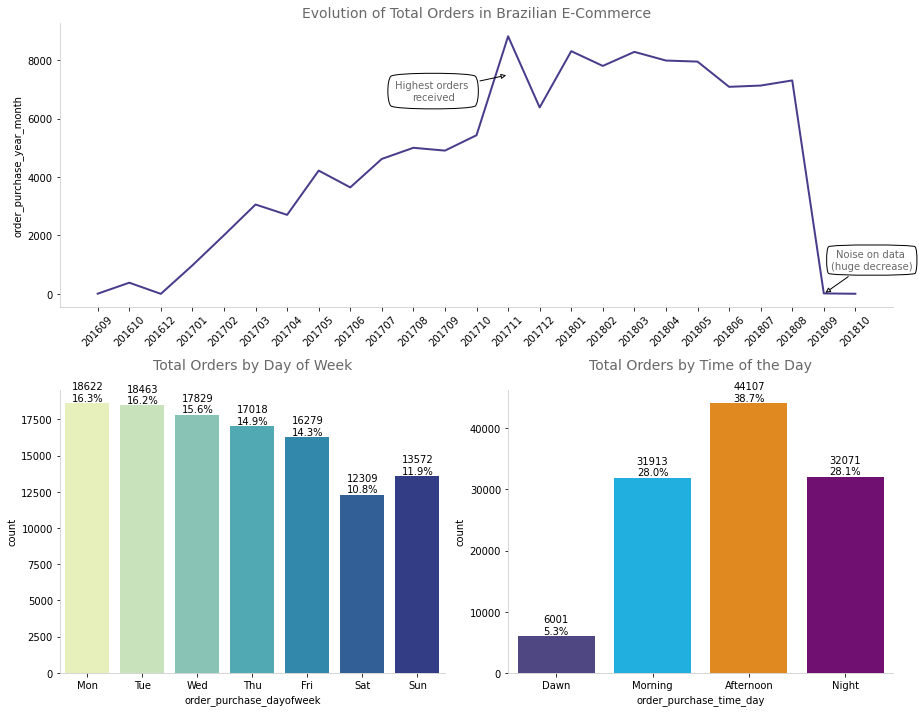

In [117]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=df_orders['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
format_spines(ax1, right_border=False)  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
single_countplot(df_orders, x='order_purchase_dayofweek', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total of orders by time of the day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(df_orders, x='order_purchase_time_day', ax=ax3, order=False, palette=day_color_list)
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()